In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sns.set_theme(style="whitegrid")

file_path = 'stats.csv'  

df = pd.read_csv(file_path, header=None)

print("### Dataset Loaded ###")
print(f"Shape of the DataFrame: {df.shape}") 
print("\nPreview of the first 10 rows:")
df.head(10)

### Dataset Loaded ###
Shape of the DataFrame: (10, 973)

Preview of the first 10 rows:


,0,1,2,3,4,5,6,7,8,9,...,963,964,965,966,967,968,969,970,971,972
0,[run number],1,1,1,1,1,1,1,1,1,...,107,108,108,108,108,108,108,108,108,108
1,accident-probability,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,helmet?,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,change-lane-switch?,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,scooter-safety-slider,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,[reporter],[step],car-person-accidents,car-scooter-accidents,scooter-person-accidents,scooter-scooter-accidents,average-congestion,helmet-ratio,average-scooter-travel-time,average-car-travel-time,...,average-car-travel-time,[step],car-person-accidents,car-scooter-accidents,scooter-person-accidents,scooter-scooter-accidents,average-congestion,helmet-ratio,average-scooter-travel-time,average-car-travel-time
6,[final],30001,3,6,8,10,0.9109730848861280,0.9109730848861280,4278.285714285720,3124.240740740740,...,5004.4047619047600,30001,9,7,23,9,0.5797101449275360,1,3710.9473684210500,3211.214285714290
7,[min],0,0,0,0,0,0,0,285,167,...,220,0,0,0,0,0,0,1,441,80
8,[max],30001,3,6,8,10,8.364389233954450,0,4278.285714285720,3124.240740740740,...,5004.4047619047600,30001,9,7,23,9,15.486542443064200,1,3710.9473684210500,3211.214285714290
9,[mean],15000.5,2.579928005,5.255482967802150,6.962835810945940,9.242017198853410,1.1847712567958700,0,NaN,NaN,...,NaN,15000.5,8.408639424038400,6.792847143523770,21.490100659956000,8.753116459,1.3594097177514300,1,NaN,NaN


In [3]:
# Parse Parameter Combinations

NUM_PARAMS = 36          
REPS = 3                 
METRICS_PER_REP = 9      
TOTAL_COLUMNS = NUM_PARAMS * REPS * METRICS_PER_REP  

print(f"\n### Parameter Combinations ###")
print(f"Number of Parameter Combinations: {NUM_PARAMS}")
print(f"Expected Total Data Columns: {TOTAL_COLUMNS}")
print(f"Actual Data Columns: {df.shape[1]}")

if df.shape[1] < TOTAL_COLUMNS + 1:
    print("Warning: The CSV has fewer columns than expected. Please verify the data.")
elif df.shape[1] > TOTAL_COLUMNS + 1:
    print("Warning: The CSV has more columns than expected. Extra columns will be ignored.")
else:
    print("Total number of columns matches the expectation.")

# Extract parameter rows (Rows 1-5 -> indices0-4)
param_rows = df.iloc[0:5, 1:1 + TOTAL_COLUMNS] 

params_list = []

for param_id in range(NUM_PARAMS):
    for rep in range(REPS):
        start_col = param_id * REPS * METRICS_PER_REP + rep * METRICS_PER_REP

        if rep == 0:
            try:
                accident_probability = param_rows.iloc[1, param_id * REPS * METRICS_PER_REP]
                helmet = param_rows.iloc[2, param_id * REPS * METRICS_PER_REP]
                change_lane_switch = param_rows.iloc[3, param_id * REPS * METRICS_PER_REP]
                scooter_safety_slider = param_rows.iloc[4, param_id * REPS * METRICS_PER_REP]
            except IndexError:
                print(f"IndexError: Unable to extract parameters for param_id={param_id}. Assigning NaN.")
                accident_probability = np.nan
                helmet = np.nan
                change_lane_switch = np.nan
                scooter_safety_slider = np.nan
        else:
            accident_probability = params_list[param_id * REPS + 0]['accident_probability']
            helmet = params_list[param_id * REPS + 0]['helmet']
            change_lane_switch = params_list[param_id * REPS + 0]['change_lane_switch']
            scooter_safety_slider = params_list[param_id * REPS + 0]['scooter_safety_slider']

        params_list.append({
            'param_id': param_id,
            'repetition': rep + 1,  
            'accident_probability': accident_probability,
            'helmet': helmet,
            'change_lane_switch': change_lane_switch,
            'scooter_safety_slider': scooter_safety_slider
        })

param_df = pd.DataFrame(params_list)

print("\n### Sample Parameter Combinations ###")
param_df.head(10)


### Parameter Combinations ###
Number of Parameter Combinations: 36
Expected Total Data Columns: 972
Actual Data Columns: 973
Total number of columns matches the expectation.

### Sample Parameter Combinations ###


,param_id,repetition,accident_probability,helmet,change_lane_switch,scooter_safety_slider
0,0,1,0.1,0,0,0.2
1,0,2,0.1,0,0,0.2
2,0,3,0.1,0,0,0.2
3,1,1,0.1,0,0,0.5
4,1,2,0.1,0,0,0.5
5,1,3,0.1,0,0,0.5
6,2,1,0.1,0,0,0.7
7,2,2,0.1,0,0,0.7
8,2,3,0.1,0,0,0.7
9,3,1,0.1,0,1,0.2


In [4]:

# Reshape the Metrics Data

metric_names = [
    'step',
    'car_person_accidents',
    'car_scooter_accidents',
    'scooter_person_accidents',
    'scooter_scooter_accidents',
    'average_congestion',
    'helmet_ratio',
    'avg_scooter_travel_time',
    'avg_car_travel_time'
]

# Extract metrics rows (Rows 6-9 -> indices5-8)
metrics_rows = df.iloc[6:10, 1:1 + TOTAL_COLUMNS]  

print(f"\n### Metrics Rows Shape ###")
print(metrics_rows.shape)  

metrics_data = []

for param_id in range(NUM_PARAMS):
    for rep in range(REPS):
        for metric_idx, metric in enumerate(metric_names):
            column_index = param_id * REPS * METRICS_PER_REP + rep * METRICS_PER_REP + metric_idx + 1
            
            if column_index > TOTAL_COLUMNS:
                print(f"Warning: Column index {column_index} exceeds total columns {TOTAL_COLUMNS}. Skipping.")
                continue
            
            # Extract stats from rows6-9 (indices5-8)
            try:
                final = metrics_rows.iloc[0, column_index - 1]
                min_val = metrics_rows.iloc[1, column_index - 1]
                max_val = metrics_rows.iloc[2, column_index - 1]
                mean_val = metrics_rows.iloc[3, column_index - 1]
            except IndexError:
                print(f"IndexError: Unable to extract data for param_id={param_id}, rep={rep +1}, metric={metric}. Assigning NaN.")
                final = np.nan
                min_val = np.nan
                max_val = np.nan
                mean_val = np.nan
            
            metrics_data.append({
                'param_id': param_id,
                'repetition': rep + 1,
                'metric': metric,
                'final': final,
                'min': min_val,
                'max': max_val,
                'mean': mean_val
            })

metrics_df = pd.DataFrame(metrics_data)

print(f"\n### Reshaped Metrics Data ###")
metrics_df.head(20)



### Metrics Rows Shape ###
(4, 972)

### Reshaped Metrics Data ###


,param_id,repetition,metric,final,min,max,mean
0,0,1,step,30001,0,30001,15000.5
1,0,1,car_person_accidents,3,0,3,2.579928005
2,0,1,car_scooter_accidents,6,0,6,5.255482967802150
3,0,1,scooter_person_accidents,8,0,8,6.962835810945940
4,0,1,scooter_scooter_accidents,10,0,10,9.242017198853410
5,0,1,average_congestion,0.9109730848861280,0,8.364389233954450,1.1847712567958700
6,0,1,helmet_ratio,0.9109730848861280,0,0,0
7,0,1,avg_scooter_travel_time,4278.285714285720,285,4278.285714285720,NaN
8,0,1,avg_car_travel_time,3124.240740740740,167,3124.240740740740,NaN
9,0,2,step,30001,0,30001,15000.5


In [5]:
# Merge Metrics with Parameter Combinations

final_df = pd.merge(metrics_df, param_df, on=['param_id', 'repetition'], how='left')

final_df.fillna(0, inplace=True)

print(f"\n### Final Merged DataFrame ###")
final_df.head(20)



### Final Merged DataFrame ###


,param_id,repetition,metric,final,min,max,mean,accident_probability,helmet,change_lane_switch,scooter_safety_slider
0,0,1,step,30001,0,30001,15000.5,0.1,0,0,0.2
1,0,1,car_person_accidents,3,0,3,2.579928005,0.1,0,0,0.2
2,0,1,car_scooter_accidents,6,0,6,5.255482967802150,0.1,0,0,0.2
3,0,1,scooter_person_accidents,8,0,8,6.962835810945940,0.1,0,0,0.2
4,0,1,scooter_scooter_accidents,10,0,10,9.242017198853410,0.1,0,0,0.2
5,0,1,average_congestion,0.9109730848861280,0,8.364389233954450,1.1847712567958700,0.1,0,0,0.2
6,0,1,helmet_ratio,0.9109730848861280,0,0,0,0.1,0,0,0.2
7,0,1,avg_scooter_travel_time,4278.285714285720,285,4278.285714285720,0,0.1,0,0,0.2
8,0,1,avg_car_travel_time,3124.240740740740,167,3124.240740740740,0,0.1,0,0,0.2
9,0,2,step,30001,0,30001,15000.5,0.1,0,0,0.2


In [52]:
# Aggregate Statistics Across Repetitions

for col in ['final', 'min', 'max', 'mean']:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')

pivot_df = final_df.pivot_table(
    index=['param_id', 'repetition', 'accident_probability', 'helmet', 'change_lane_switch', 'scooter_safety_slider'],
    columns='metric',
    values=['final', 'min', 'max', 'mean'],
    aggfunc='first'  
)

# Flatten the MultiIndex columns
pivot_df.columns = [f"{metric}_{stat}" for stat, metric in pivot_df.columns]

pivot_df.reset_index(inplace=True)

print("\n### Pivoted Metrics Data ###")
pivot_df.head(10)
#pivot_df.to_csv('pivot_df.csv', index=False)




### Pivoted Metrics Data ###


,param_id,repetition,accident_probability,helmet,change_lane_switch,scooter_safety_slider,average_congestion_final,avg_car_travel_time_final,avg_scooter_travel_time_final,car_person_accidents_final,...,step_mean,average_congestion_min,avg_car_travel_time_min,avg_scooter_travel_time_min,car_person_accidents_min,car_scooter_accidents_min,helmet_ratio_min,scooter_person_accidents_min,scooter_scooter_accidents_min,step_min
0,0,1,0.1,0,0,0.2,0.910973,3124.240741,4278.285714,3.0,...,15000.5,0,167,285,0,0,0,0,0,0
1,0,2,0.1,0,0,0.2,0.331263,4096.703704,4113.363636,6.0,...,15000.5,0,361,341,0,0,0,0,0,0
2,0,3,0.1,0,0,0.2,0.165631,4101.938462,5287.891304,4.0,...,15000.5,0,372,0,0,0,0,0,0,0
3,1,1,0.1,0,0,0.5,0.082816,5065.090909,6364.962963,2.0,...,15000.5,0,229,422,0,0,0,0,0,0
4,1,2,0.1,0,0,0.5,0.082816,4114.508475,4856.170213,8.0,...,15000.5,0,538,256,0,0,0,0,0,0
5,1,3,0.1,0,0,0.5,0.248447,4947.839286,4888.480000,6.0,...,15000.5,0,334,4,0,0,0,0,0,0
6,2,1,0.1,0,0,0.7,0.331263,4216.730159,3944.735849,1.0,...,15000.5,0,130,356,0,0,0,0,0,0
7,2,2,0.1,0,0,0.7,0.248447,4262.253968,5187.139535,3.0,...,15000.5,0,0,204,0,0,0,0,0,0
8,2,3,0.1,0,0,0.7,0.331263,3640.465517,4971.295082,4.0,...,15000.5,0,314,1,0,0,0,0,0,0
9,3,1,0.1,0,1,0.2,0.910973,3230.724138,3100.720000,3.0,...,15000.5,0,290,0,0,0,0,0,0,0


In [73]:
# Define metric columns and their corresponding final column names
metric_to_final_col = {
    'average_congestion_mean': 'average_congestion_mean',
    'avg_car_travel_time_final': 'avg_car_travel_time_mean',
    'avg_scooter_travel_time_final': 'avg_scooter_travel_time_mean',
    'car_person_accidents_mean': 'car_person_accidents_mean',
    'car_scooter_accidents_mean': 'car_scooter_accidents_mean',
    'scooter_person_accidents_mean': 'scooter_person_accidents_mean',
    'scooter_scooter_accidents_mean': 'scooter_scooter_accidents_mean',
}

# Convert to numeric
for col in metric_to_final_col.keys():
    pivot_df[col] = pd.to_numeric(pivot_df[col], errors='coerce')

print("Column names:", pivot_df.columns)
print("Data types:\n", pivot_df.dtypes)

# Create aggregation dictionary
agg_dict = {metric: 'mean' for metric in metric_to_final_col.keys()}

print("Aggregation dictionary:", agg_dict)

# Perform groupby aggregation
try:
    aggregated_df = pivot_df.groupby('param_id').agg(agg_dict).reset_index()
except Exception as e:
    print("Error during aggregation:", e)

aggregated_df.rename(columns=metric_to_final_col, inplace=True)

additional_columns = ['accident_probability', 'helmet', 'change_lane_switch', 'scooter_safety_slider']
for col in additional_columns:
    aggregated_df[col] = pivot_df.groupby('param_id')[col].first().values

aggregated_df.fillna(0, inplace=True)  

print("\n### Aggregated DataFrame ###")
aggregated_df.head(36)
#aggregated_df.shape


Column names: Index(['param_id', 'repetition', 'accident_probability', 'helmet',
       'change_lane_switch', 'scooter_safety_slider',
       'average_congestion_final', 'avg_car_travel_time_final',
       'avg_scooter_travel_time_final', 'car_person_accidents_final',
       'car_scooter_accidents_final', 'helmet_ratio_final',
       'scooter_person_accidents_final', 'scooter_scooter_accidents_final',
       'step_final', 'average_congestion_max', 'avg_car_travel_time_max',
       'avg_scooter_travel_time_max', 'car_person_accidents_max',
       'car_scooter_accidents_max', 'helmet_ratio_max',
       'scooter_person_accidents_max', 'scooter_scooter_accidents_max',
       'step_max', 'average_congestion_mean', 'avg_car_travel_time_mean',
       'avg_scooter_travel_time_mean', 'car_person_accidents_mean',
       'car_scooter_accidents_mean', 'helmet_ratio_mean',
       'scooter_person_accidents_mean', 'scooter_scooter_accidents_mean',
       'step_mean', 'average_congestion_min', 'avg_ca

,param_id,average_congestion_mean,avg_car_travel_time_mean,avg_scooter_travel_time_mean,car_person_accidents_mean,car_scooter_accidents_mean,scooter_person_accidents_mean,scooter_scooter_accidents_mean,accident_probability,helmet,change_lane_switch,scooter_safety_slider
0,0,1.122592,3774.294302,4559.846885,3.944059,2.074573,10.280248,7.129880,0.1,0,0,0.2
1,1,1.241970,4709.146223,5369.871059,4.817957,2.038309,17.739806,8.204175,0.1,0,0,0.5
2,2,1.287587,4039.816548,4701.056822,2.409195,1.624614,13.433582,6.618592,0.1,0,0,0.7
3,3,1.845405,3888.462747,3536.673618,3.010877,2.879775,8.501433,3.362209,0.1,0,1,0.2
4,4,1.625258,3928.937241,3841.174411,3.195965,2.130614,7.425383,3.061707,0.1,0,1,0.5
5,5,1.984838,3805.797596,3989.429193,3.773504,2.878819,8.996711,5.205586,0.1,0,1,0.7
6,6,1.251317,3813.775996,4556.032500,3.133758,1.762516,16.205709,10.320556,0.1,1,0,0.2
7,7,1.258792,3574.315928,3787.617914,3.211764,2.756194,18.395463,9.207764,0.1,1,0,0.5
8,8,1.138319,3545.352170,4371.684819,1.572251,1.853332,13.381063,11.867742,0.1,1,0,0.7
9,9,1.621852,3525.284439,3287.042101,2.550630,5.474157,8.060863,5.673111,0.1,1,1,0.2


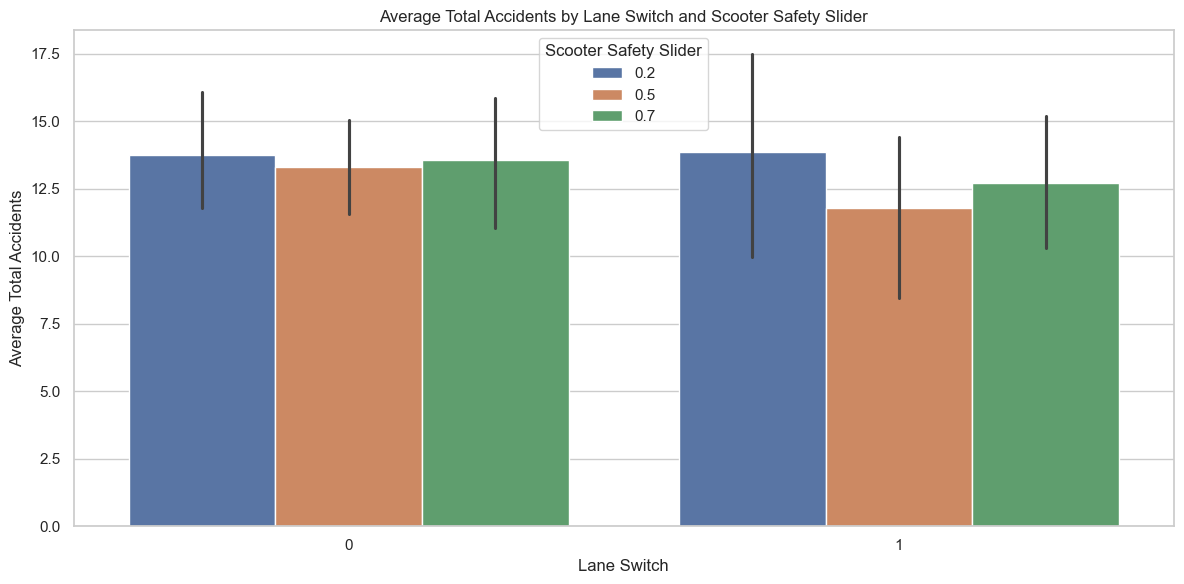

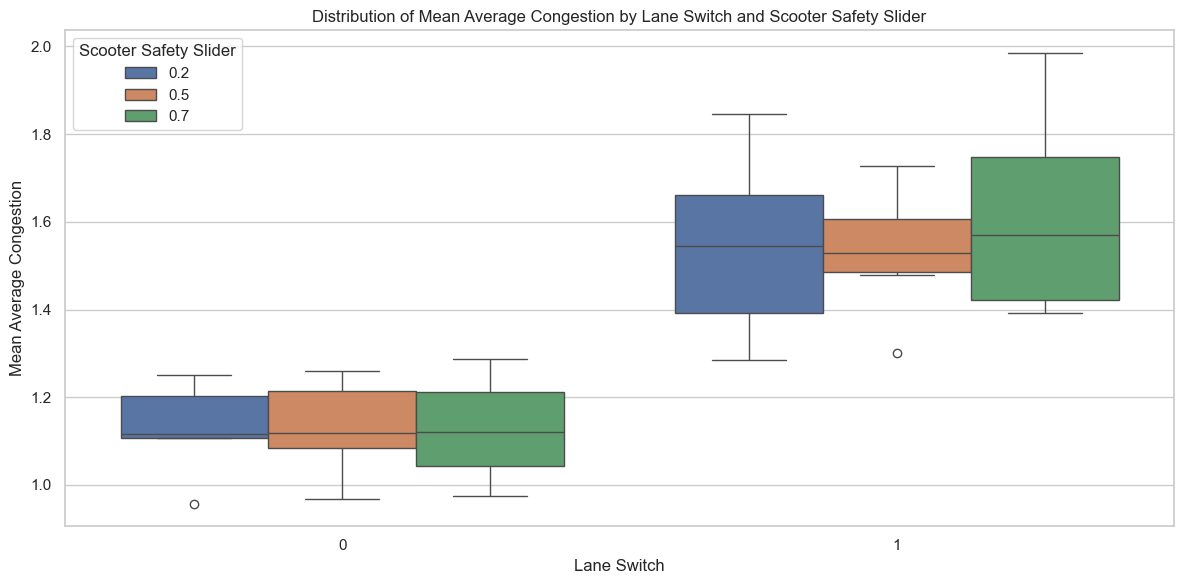

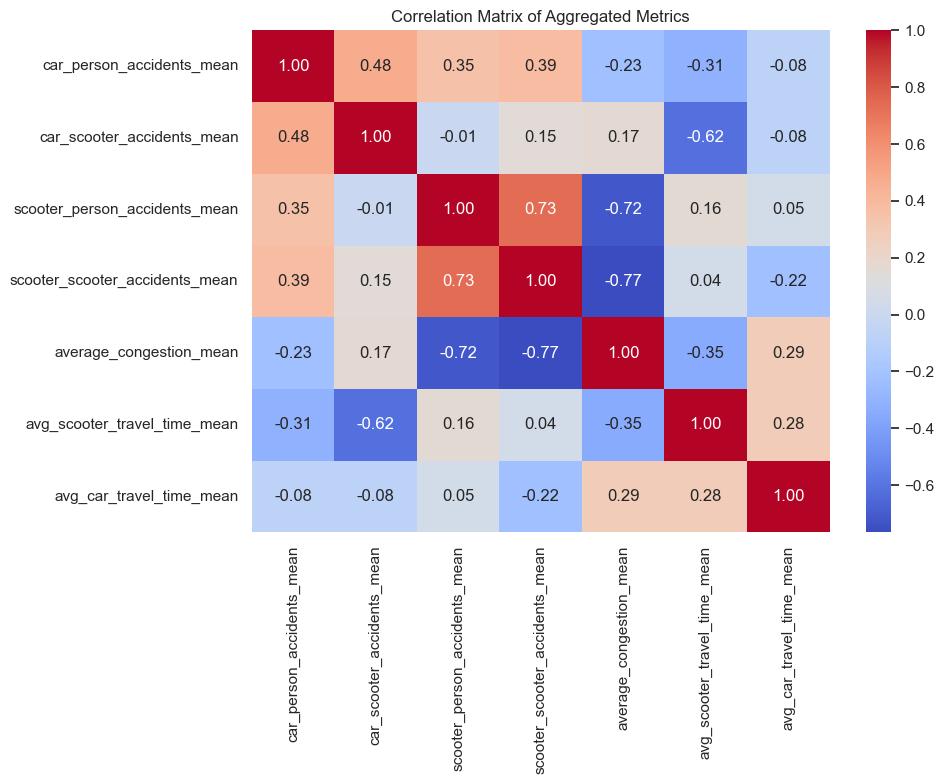

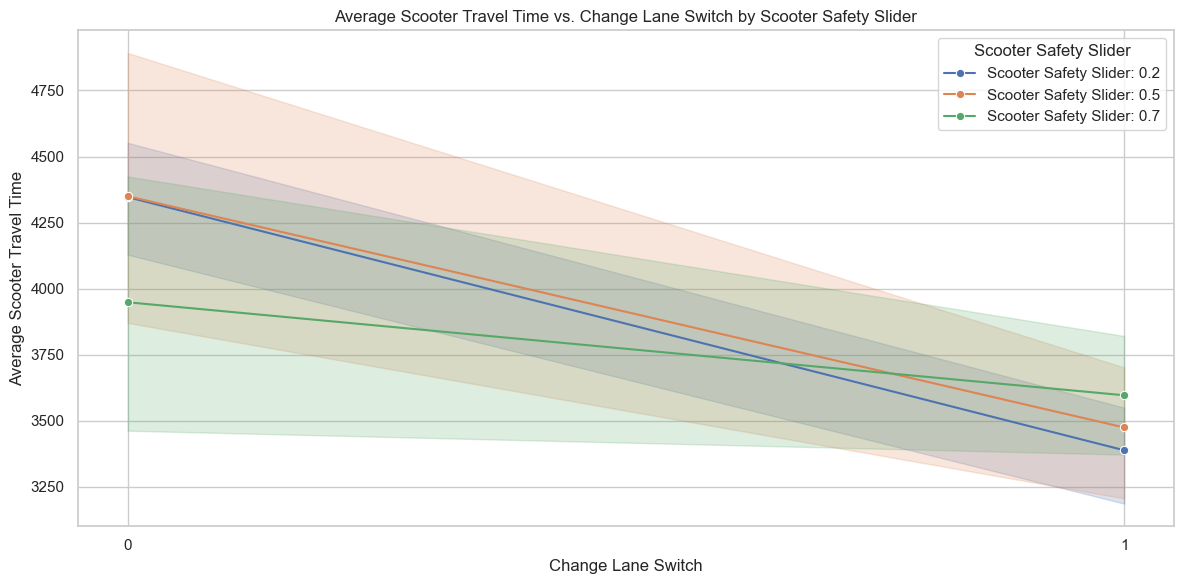

In [79]:

# Visualize the Aggregated Statistics

# Bar Plot: Average Final Car-Person Accidents by Change Lane Switch and Scooter Safety Slider
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_df,
    x='change_lane_switch',
    y='total_accidents',
    hue='scooter_safety_slider'
)
plt.title('Average Total Accidents by Lane Switch and Scooter Safety Slider')
plt.xlabel('Lane Switch')
plt.ylabel('Average Total Accidents')
plt.legend(title='Scooter Safety Slider')
plt.tight_layout()
plt.show()

# Boxplot: Distribution of Average Congestion by Change Lane Switch and Scooter Safety Slider
average_congestion_df = final_df[final_df['metric'] == 'average_congestion']

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=aggregated_df,
    x='change_lane_switch',
    y='average_congestion_mean',  
    hue='scooter_safety_slider'
)
plt.title('Distribution of Mean Average Congestion by Lane Switch and Scooter Safety Slider')
plt.xlabel('Lane Switch')
plt.ylabel('Mean Average Congestion')
plt.legend(title='Scooter Safety Slider')
plt.tight_layout()
plt.show()

# Heatmap: Correlation Between Aggregated Metrics
corr_metrics = [
    'car_person_accidents_mean',
    'car_scooter_accidents_mean',
    'scooter_person_accidents_mean',
    'scooter_scooter_accidents_mean',
    'average_congestion_mean',
    'avg_scooter_travel_time_mean',
    'avg_car_travel_time_mean'
]

existing_corr_metrics = [metric for metric in corr_metrics if metric in aggregated_df.columns]
missing_corr_metrics = set(corr_metrics) - set(existing_corr_metrics)
if missing_corr_metrics:
    print(f"\nWarning: The following metrics are missing and won't be included in the correlation matrix: {missing_corr_metrics}")

if existing_corr_metrics:
    for metric in existing_corr_metrics:
        aggregated_df[metric] = pd.to_numeric(aggregated_df[metric], errors='coerce')

    corr_data = aggregated_df[existing_corr_metrics].dropna()
    corr_matrix = corr_data.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Aggregated Metrics')
    plt.tight_layout()
    plt.show()
else:
    print("No metrics available for correlation matrix.")

# Facet Grid: Average Scooter Travel Time vs. Scooter Safety Slider by Lane Switch
plt.figure(figsize=(12, 6))

# Plot for each scooter_safety_slider value
for safety_slider in aggregated_df['scooter_safety_slider'].unique():
    subset = aggregated_df[aggregated_df['scooter_safety_slider'] == safety_slider]
    sns.lineplot(
        data=subset,
        x='change_lane_switch',
        y='avg_scooter_travel_time_mean',
        marker='o',
        label=f'Scooter Safety Slider: {safety_slider}'
    )

plt.title('Average Scooter Travel Time vs. Change Lane Switch by Scooter Safety Slider')
plt.xlabel('Change Lane Switch')
plt.ylabel('Average Scooter Travel Time')
plt.legend(title='Scooter Safety Slider')
plt.tight_layout()
plt.show()



accident rate where (people are not wearing helmets and change lane), (wear helmet, not change lane), (not wear helmet, change lane), (wear helmet, change lane) (done)

merge number of scooter vs. average travel time (cant do this, scooter number are fixed from parameterisation).

emergence graph for (average congestion vs. ticks) and (number of accidents vs. ticks)

merge the avg scooter travel time and scooter safety slider


### Top Policy Data ###
    param_id  average_congestion_mean  avg_car_travel_time_mean  \
4          4                 1.625258               3928.937241   
3          3                 1.845405               3888.462747   
5          5                 1.984838               3805.797596   
9          9                 1.621852               3525.284439   
10        10                 1.728256               4094.073412   

    avg_scooter_travel_time_mean  car_person_accidents_mean  \
4                    3841.174411                   3.195965   
3                    3536.673618                   3.010877   
5                    3989.429193                   3.773504   
9                    3287.042101                   2.550630   
10                   3706.979049                   3.400696   

    car_scooter_accidents_mean  scooter_person_accidents_mean  \
4                     2.130614                       7.425383   
3                     2.879775                       8.501433  

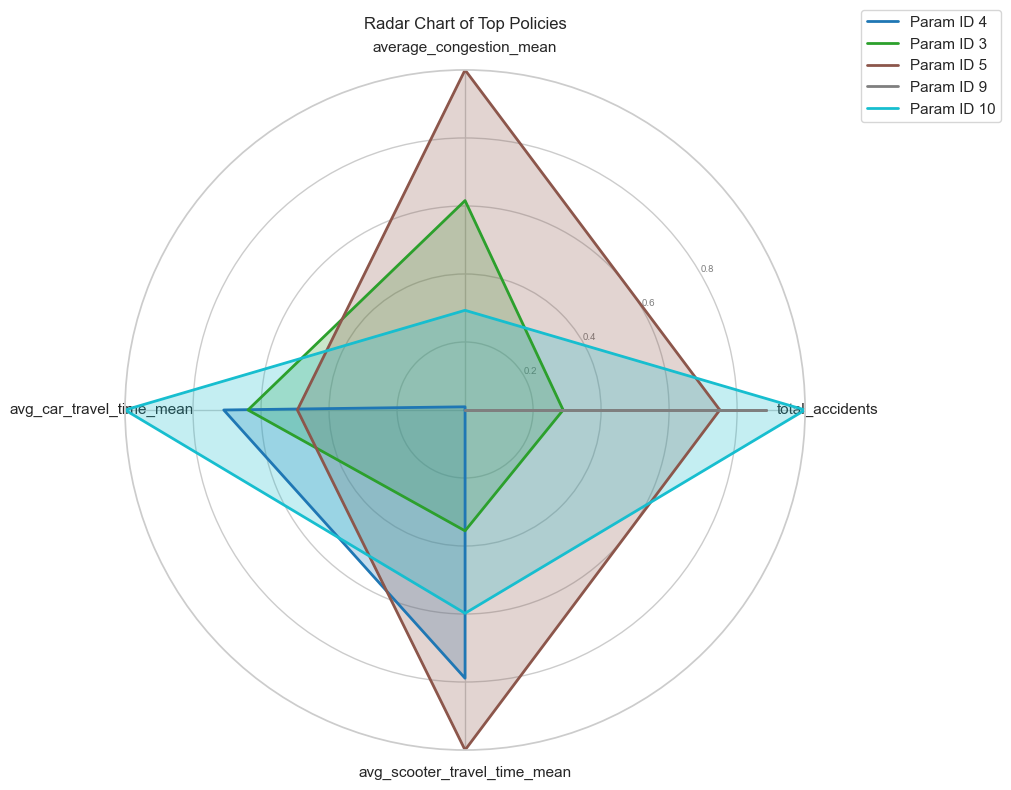

In [81]:
# Function to create radar chart on a given Axes
def create_radar_chart(ax, categories, values, color, label):
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Append the first value to the end to match the angles
    values += values[:1]

    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, values, color=color, alpha=0.25)
    # Remove or adjust the title setting to prevent overlapping titles
    # ax.set_title(title, size=11, color=color, y=1.1)

    # Set the labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_rlabel_position(30)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8])
    ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
    ax.set_ylim(0, 1)

# Calculate total accidents
accident_columns = [col for col in aggregated_df.columns if 'accidents_mean' in col]
aggregated_df['total_accidents'] = aggregated_df[accident_columns].sum(axis=1)

# Select the policy combinations with the smallest total accidents
top_policy = aggregated_df.nsmallest(5, 'total_accidents')

print("\n### Top Policy Data ###")
print(top_policy)

metrics = ['total_accidents', 'average_congestion_mean', 
           'avg_car_travel_time_mean', 'avg_scooter_travel_time_mean']

missing_metrics = [metric for metric in metrics if metric not in aggregated_df.columns]
if missing_metrics:
    print(f"Warning: The following metrics are missing and won't be included: {missing_metrics}")
    metrics = [metric for metric in metrics if metric in aggregated_df.columns]

# Normalize the metrics
scaler = MinMaxScaler()
top_policy_scaled = top_policy.copy()
top_policy_scaled[metrics] = scaler.fit_transform(top_policy_scaled[metrics])

print("\n### Scaled Top Policy Data ###")
print(top_policy_scaled)

# Plot radar chart
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)  

colors = plt.cm.tab10(np.linspace(0, 1, len(top_policy_scaled)))

for idx, ((_, row), color) in enumerate(zip(top_policy_scaled.iterrows(), colors)):
    categories = metrics
    values = row[metrics].tolist()
    label = f"Param ID {row['param_id']}"
    create_radar_chart(ax, categories, values, color, label)

# Adjust the legend to prevent overlapping
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Radar Chart of Top Policies', pad=30)  
plt.tight_layout()
plt.show()

##### Baseline No Policy: 0.3 accident-probability, 0 helmets, 1 change-lane-switch, 0.1 scooter-safety 

##### Least congestion policy : 0.3 accident-probability, 0 helmets, 0 change-lane-switch, 0.2 scooter-safety 

##### Least accident policy : 0.1 accident-probability, 1 helmets, 0 change-lane-switch, 0.7 scooter-safety 

id 4 - 0.1 accident-probability, 1 helmets, 0 change-lane-switch, 0.7 scooter-safety 

id 3 - 0.1 accident-probability, 0 helmets, 1 change-lane-switch, 0.2 scooter-safety 

id 5 - 0.1 accident-probability, 0 helmets, 1 change-lane-switch, 0.7 scooter-safety 

id 9 - 0.1 accident-probability, 1 helmets, 1 change-lane-switch, 0.2 scooter-safety 

id 10 - 0.1 accident-probability, 1 helmets, 1 change-lane-switch, 0.5 scooter-safety 
